In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import logging

In [ ]:
# Suppress TensorFlow warnings
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# Load the MNIST dataset (handwritten digits)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
# Normalize pixel values (0-255) to a range of 0-1 for better model performance
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Function to display an image from the dataset
def display(index):
    plt.imshow(x_test[index], cmap=plt.cm.binary)
    plt.title(f'Label: {y_test[index]}')
    plt.show()


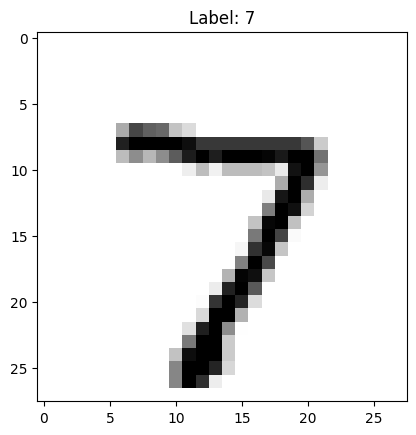

In [ ]:

# Display the first test image
display(0)

In [ ]:
# Build a simple neural network using tf.keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),  # Another fully connected layer
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model on training data (5 epochs)
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8818 - loss: 0.4004
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9690 - loss: 0.1015
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9787 - loss: 0.0668
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9845 - loss: 0.0474
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9884 - loss: 0.0360


In [ ]:
# Evaluate the model on test data
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0901
Loss: 0.0775, Accuracy: 0.9789


In [ ]:
# Make predictions on test data
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Show prediction for the first test sample
predicted_label = np.argmax(predictions[0])
actual_label = y_test[0]
print(f"Predicted Label: {predicted_label}, Actual Label: {actual_label}")

Predicted Label: 7, Actual Label: 7


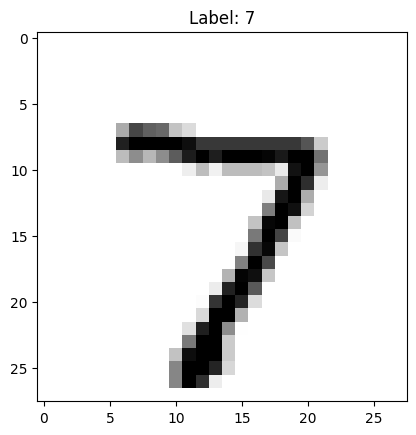

In [ ]:
# Display the image of the predicted digit
display(0)

# Save the trained model for future use
model.save('mnist_digit_classifier.h5')

# Load the saved model (for testing)
new_model = tf.keras.models.load_model('mnist_digit_classifier.h5')

In [ ]:
# Predict again using the loaded model
new_predictions = new_model.predict(x_test)
new_predicted_label = np.argmax(new_predictions[0])
print(f"New Model Prediction: {new_predicted_label}, Actual Label: {actual_label}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
New Model Prediction: 7, Actual Label: 7
